In [1]:
%matplotlib nbagg

from glob import glob

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from skimage import io, img_as_float64
import elasticdeform

In [2]:
# Retrieve train images
images = io.imread('data/train-volume.tif') / 255
labels = io.imread('data/train-labels.tif') / 255
print(images.shape)
print(labels.shape)

(30, 512, 512)
(30, 512, 512)


<IPython.core.display.Javascript object>


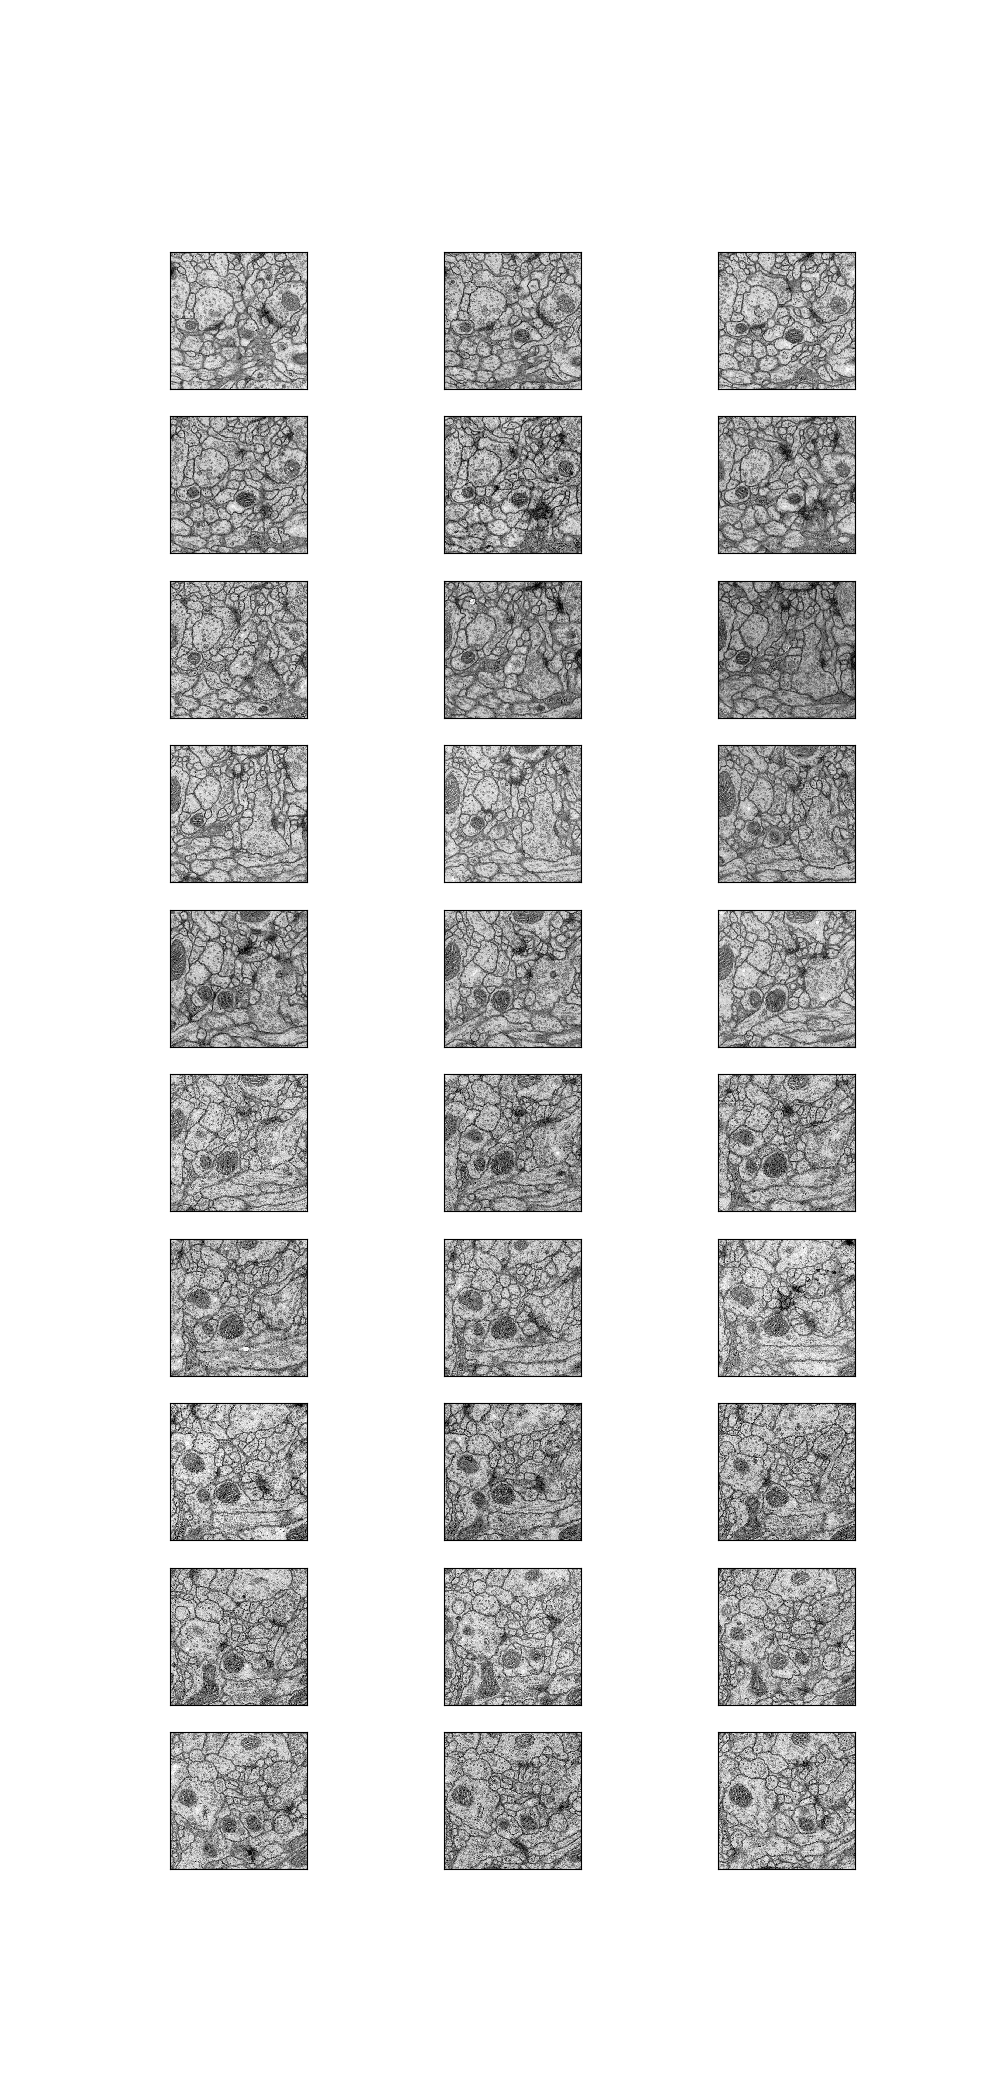

In [3]:
fig, axes = plt.subplots(figsize=(10,21), nrows=10, ncols=3)
for ax, img in zip(axes.flatten(), images):
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    im = ax.imshow(img.reshape((512,512)), cmap='Greys_r')

<IPython.core.display.Javascript object>


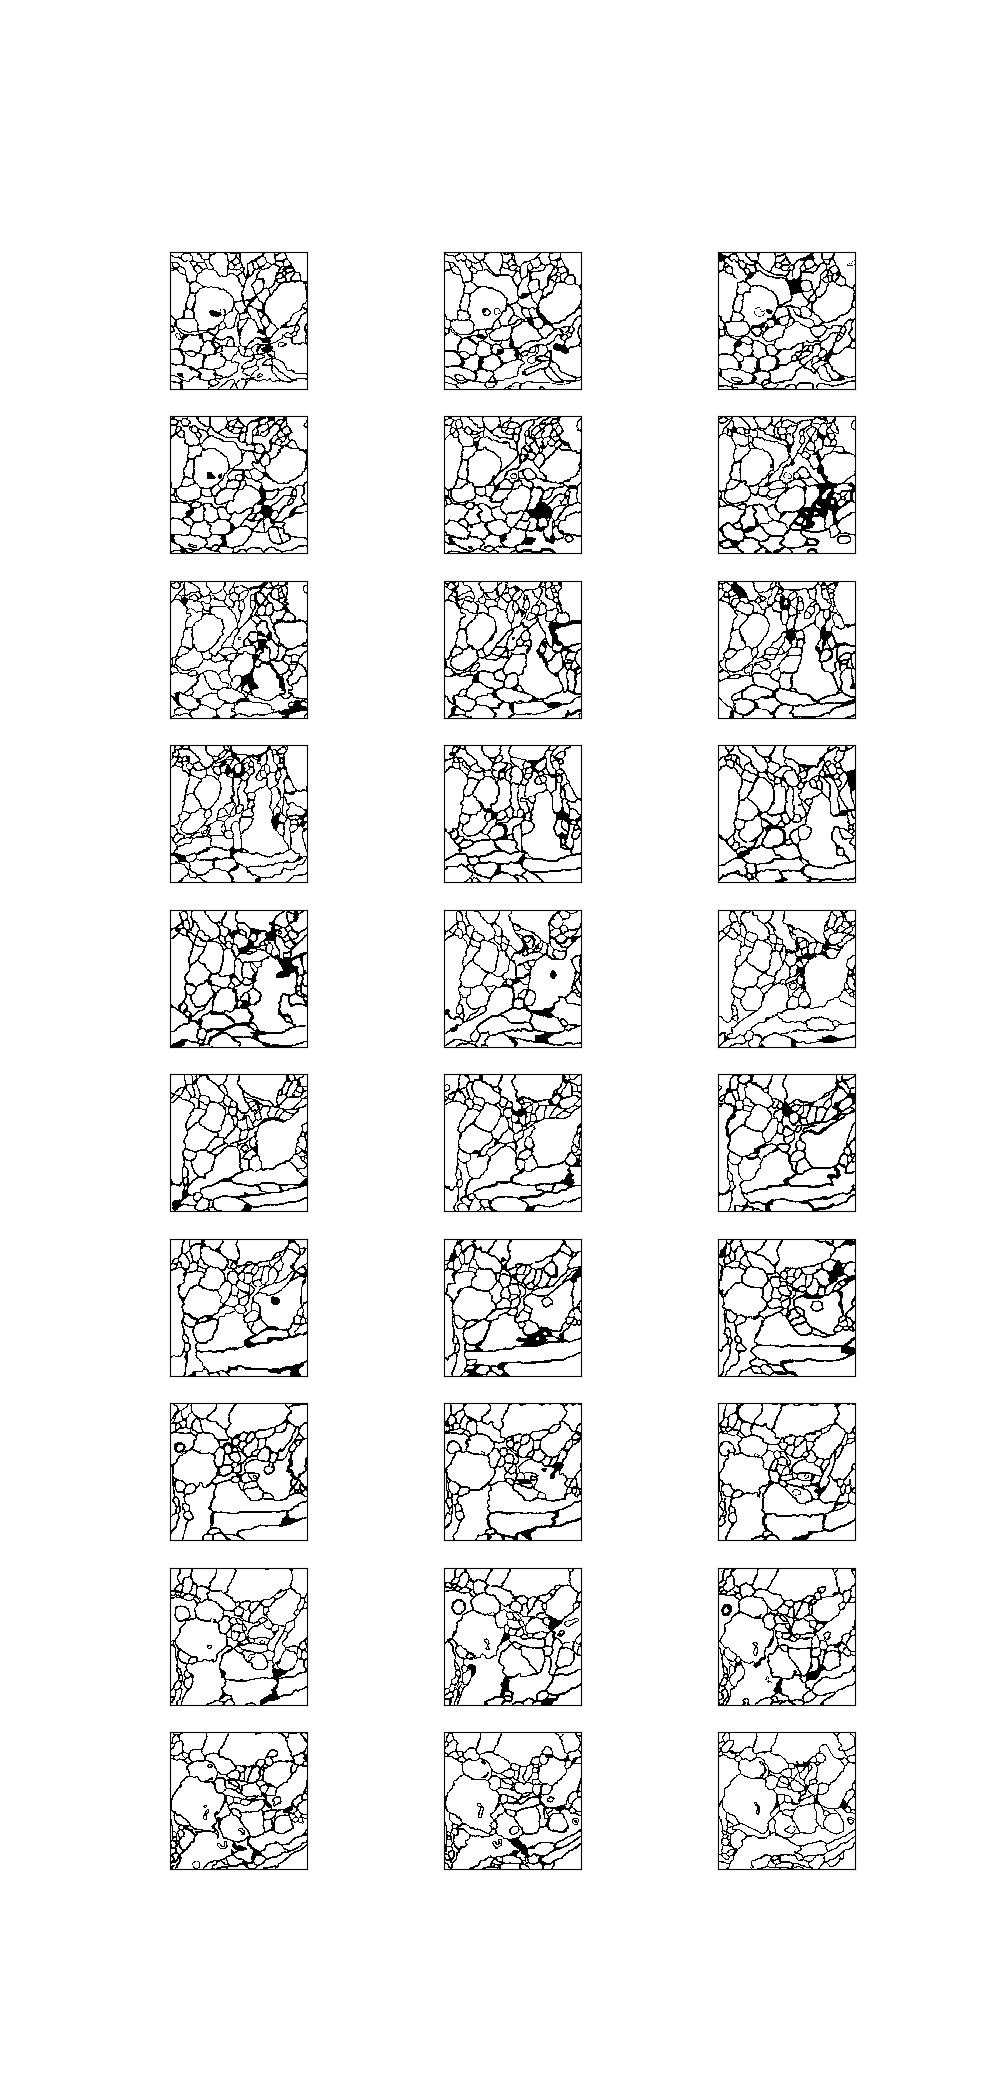

In [119]:
fig, axes = plt.subplots(figsize=(10,21), nrows=10, ncols=3)
for ax, img in zip(axes.flatten(), labels):
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    im = ax.imshow(img.reshape((512,512)), cmap='Greys_r')

<IPython.core.display.Javascript object>


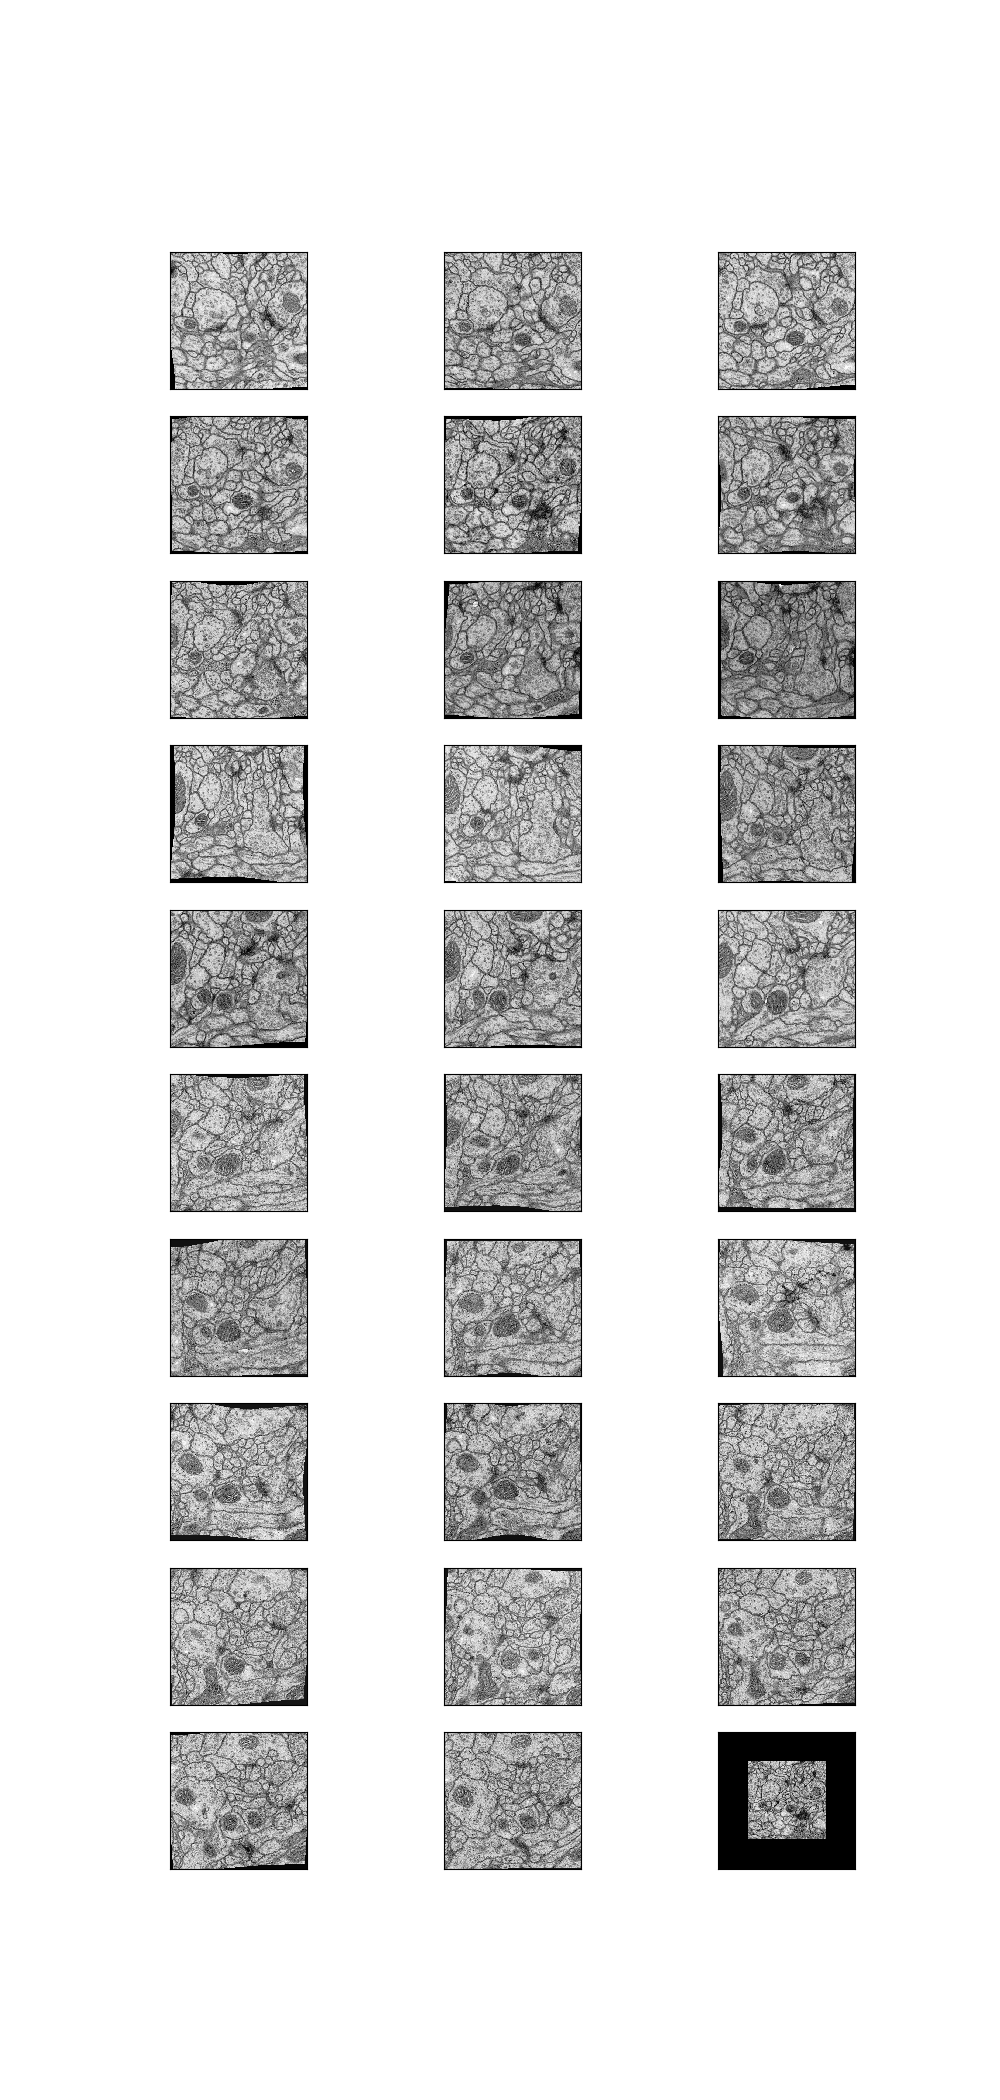

In [4]:
fig, axes = plt.subplots(figsize=(10,21), nrows=10, ncols=3)
for ax, img in zip(axes.flatten(), images):
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    img = elasticdeform.deform_random_grid(img, sigma=10, points=3)
    im = ax.imshow(img.reshape((512,512)), cmap='Greys_r')

In [103]:
print(np.unique(labels))
print(np.mean(labels))

[0. 1.]
0.7803688049316406


In [5]:
X = images[4]

In [72]:
X_ = np.zeros((X.shape[0] + 2*199, X.shape[1] + 2*199))
X_[199: X.shape[0] + 199, 199: X.shape[1] + 199] = X
# Complete X_ at left and right
X_[199:199+X.shape[0], 0:199] = np.fliplr(X[:,:199])
X_[199:199+X.shape[0], 199+X.shape[0]:] = np.fliplr(X[:, -199:])
# Complete X_ at up and down
X_[:199, 199: 199+X.shape[1]:] = np.flipud(X[:199,:])
X_[-199:, 199: 199+X.shape[1]:] = np.flipud(X[-199:,:])
# Complete corners
X_[:199, :199] = np.flip(X[:199, :199]) # left-up
X_[-199:, :199] = np.flip(X[-199:, :199]) # left-down
X_[:199, -199:] = np.flip(X[:199, -199:]) # right-up
X_[-199:, -199:] = np.flip(X[-199:, -199:]) # right-down

<IPython.core.display.Javascript object>


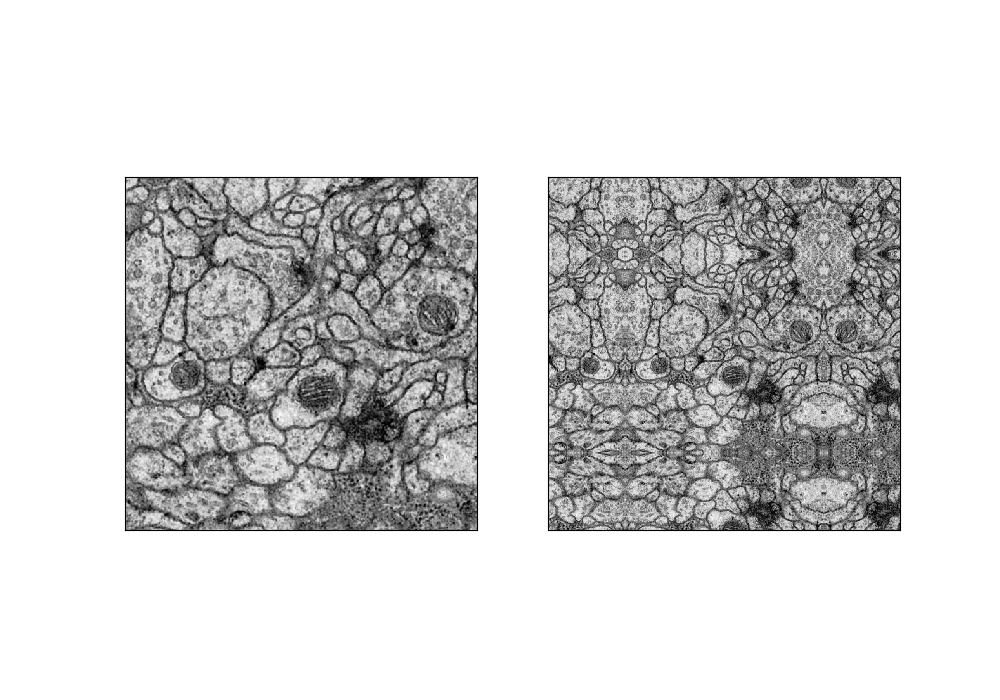

In [73]:
fig, axes = plt.subplots(figsize=(10,7), nrows=1, ncols=2)
imgs = [X, X_]
i = 0
for ax, img in zip(axes.flatten(), labels):
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    im = ax.imshow(imgs[i], cmap='Greys_r')
    i += 1

In [53]:
imgs = []
for i in range(12):
    for j in range(12):
        imgs.append(X[i*37:68+i*37,j*37:68+j*37])

<IPython.core.display.Javascript object>


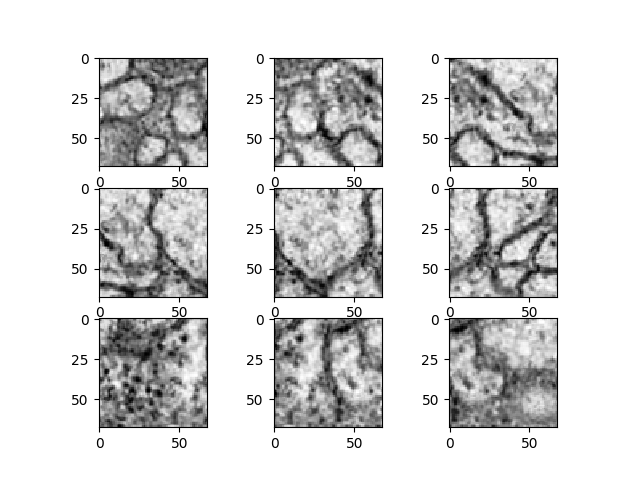

In [54]:
plt.figure()
plt.subplot(3, 3, 1)
plt.imshow(imgs[0], cmap='Greys_r')
plt.subplot(3, 3, 2)
plt.imshow(imgs[1], cmap='Greys_r')
plt.subplot(3, 3, 3)
plt.imshow(imgs[2], cmap='Greys_r')
plt.subplot(3, 3, 4)
plt.imshow(imgs[3], cmap='Greys_r')
plt.subplot(3, 3, 5)
plt.imshow(imgs[4], cmap='Greys_r')
plt.subplot(3, 3, 6)
plt.imshow(imgs[5], cmap='Greys_r')
plt.subplot(3, 3, 7)
plt.imshow(imgs[-3], cmap='Greys_r')
plt.subplot(3, 3, 8)
plt.imshow(imgs[-2], cmap='Greys_r')
plt.subplot(3, 3, 9)
plt.imshow(imgs[-1], cmap='Greys_r')
plt.show()